In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates  # Corrected typo: mdataes -> mdates
from sklearn.linear_model import LinearRegression  # Corrected typo: skleran -> sklearn
from sklearn.model_selection import train_test_split  # Corrected typo: train_test_slipt -> train_test_split



In [25]:
df=pd.read_csv("C:\\Users\\LENOVO\\OneDrive\\Documentos\\makineogrenmesi\\BTC-USD.csv")
df.head(17)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800


In [26]:
df.info

<bound method DataFrame.info of             Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
3387  2023-12-26  43599.847656  43603.175781  41676.488281  42520.402344   
3388  2023-12-27  42518.468750  43683.160156  42167.582031  43442.855469   
3389  2023-12-28  43468.199219  43804.781250  42318.550781  42627.855469   
3390  2023-12-29  42614.644531  43124.324219  41424.062500  42099.402344   
3391  2023-12-30  42091.753906  42584.125000  41556.226563  42156.902344   

         Adj Close       Volume  
0       457.334015   

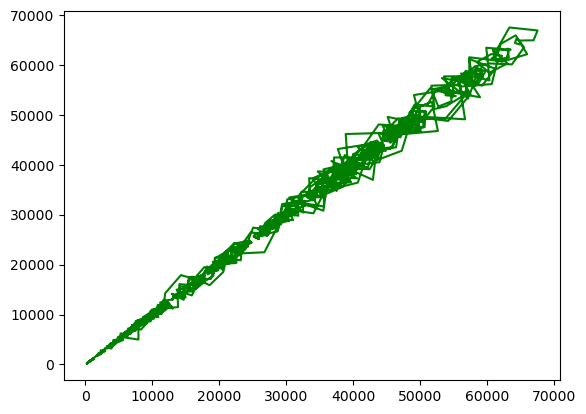

In [27]:
x=df["Open"]
y=df["Close"]
#plt.scatter(x,y,c="g")
plt.plot(x,y,c="g")

plt.show()
   

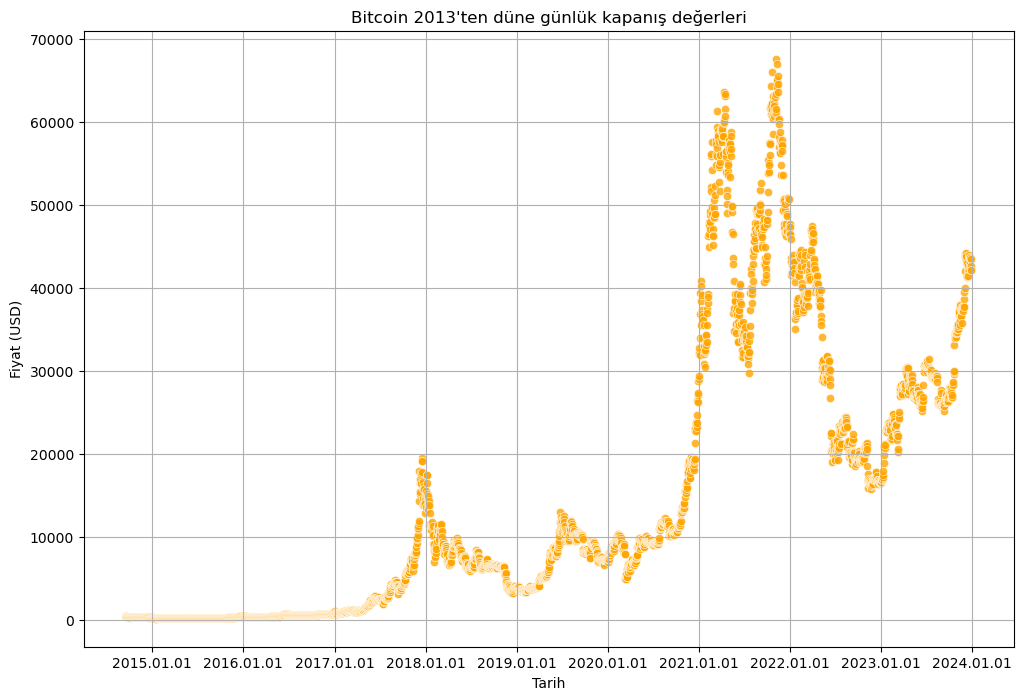

In [28]:
df['Date']=pd.to_datetime(df['Date'])
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Date', y='Close', alpha=0.8, color='orange')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.title("Bitcoin 2013'ten düne günlük kapanış değerleri")
plt.grid(True)
plt.show()

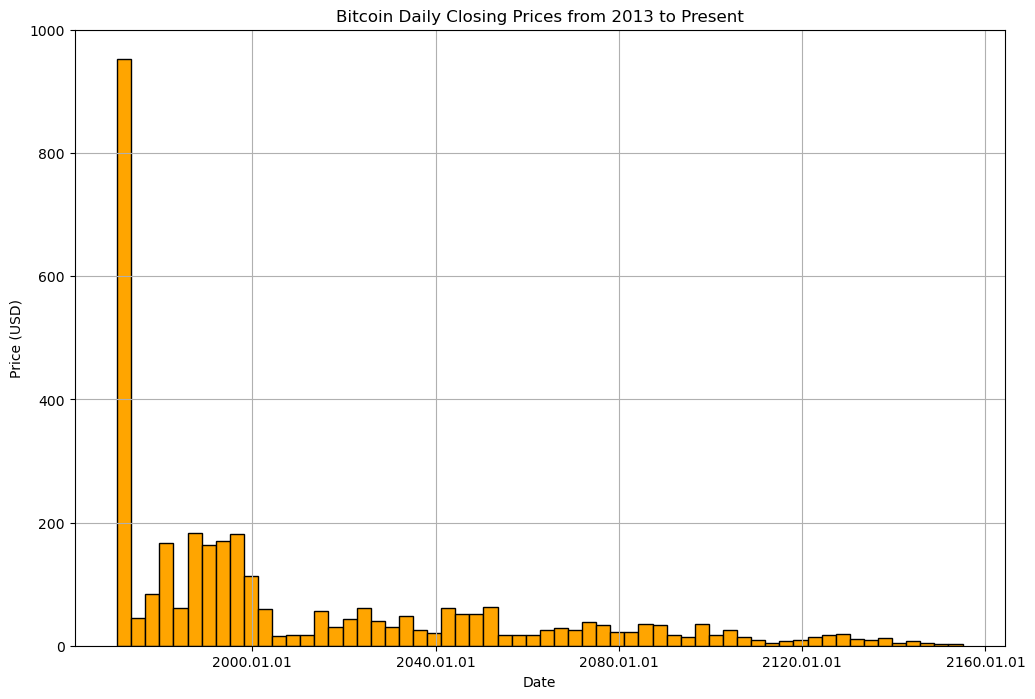

In [29]:
plt.figure(figsize=(12, 8))
plt.hist(df["Close"], bins=60 ,edgecolor="k", color="orange")
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y.%m.%d"))  # Adjust date format as needed

plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Daily Closing Prices from 2013 to Present")
plt.grid(True)
plt.show()

In [30]:
bitcoin_df=pd.read_csv("C:\\Users\\LENOVO\\OneDrive\\Documentos\\makineogrenmesi\\BTC-USD.csv")
projection_bitcoin=14
bitcoin_df["Prediction"]=bitcoin_df[["Close"]].shift(-projection_bitcoin)
x_bitcoin=np.array(bitcoin_df[["Close"]])
x_bitcoin=x_bitcoin[:-projection_bitcoin]
print(x_bitcoin)

[[  457.334015]
 [  424.440002]
 [  394.79599 ]
 ...
 [43023.972656]
 [41929.757813]
 [42240.117188]]


In [31]:
y_bitcoin=bitcoin_df["Prediction"].values
y_bitcoin=y_bitcoin[:-projection_bitcoin]
print(y_bitcoin)
x_tarin_bitcoin,x_test_bitcoin,y_tarin_bitcoin,y_test_bitcoin=train_test_split(x_bitcoin,y_bitcoin,test_size=0.20)


[  383.61499    375.071991   359.511993 ... 42627.855469 42099.402344
 42156.902344]


In [32]:
ligReg_bitcoin=LinearRegression()
ligReg_bitcoin.fit(x_tarin_bitcoin,y_tarin_bitcoin)
ligReg_confidence_bitcoin=ligReg_bitcoin.score(x_test_bitcoin,y_test_bitcoin)
print("bitcoin için linnner ",round((ligReg_confidence_bitcoin*100),3))


bitcoin için linnner  96.814


In [33]:
x_projection_bitcoin = np.array(bitcoin_df[['Close']])[-projection_bitcoin:]
print(x_projection_bitcoin)

[[41364.664063]
 [42623.539063]
 [42270.527344]
 [43652.25    ]
 [43869.152344]
 [43997.902344]
 [43739.542969]
 [43016.117188]
 [43613.140625]
 [42520.402344]
 [43442.855469]
 [42627.855469]
 [42099.402344]
 [42156.902344]]


In [34]:
linReg_projection_bitcoin = ligReg_bitcoin.predict(x_projection_bitcoin)

print(linReg_projection_bitcoin)

[41231.27903069 42475.18652335 42126.37196888 43491.66650931
 43705.98997342 43833.20918873 43577.92160072 42863.09705549
 43453.02212874 42373.27605764 43284.76159339 42479.45160906
 41957.28157493 42014.09792352]


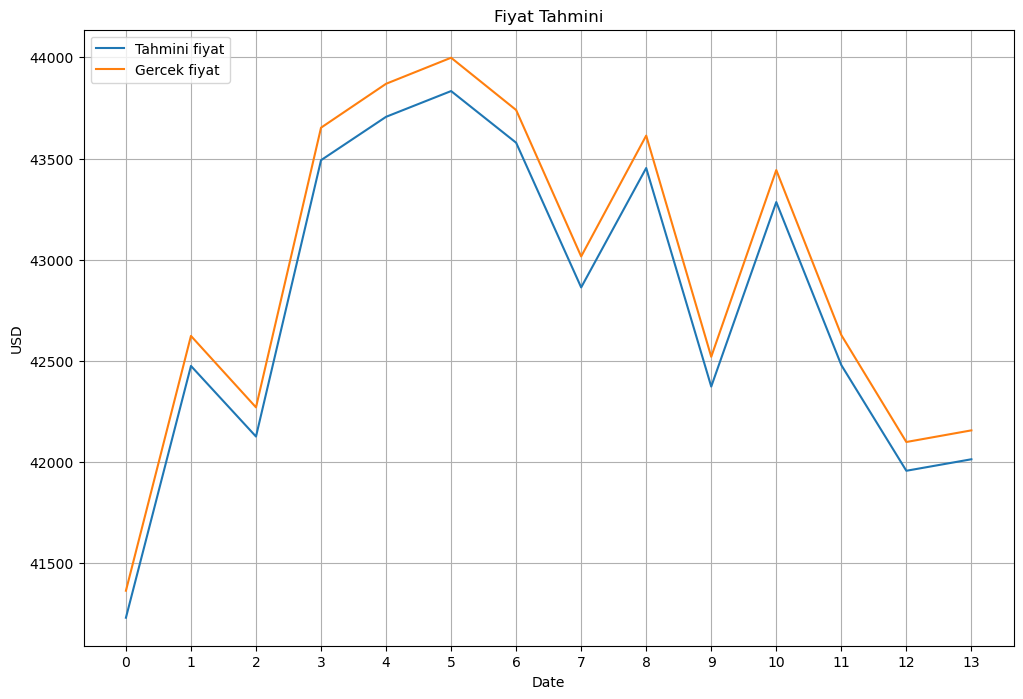

In [35]:
plt.figure(figsize=(12, 8))

plt.plot(linReg_projection_bitcoin, label='Tahmini fiyat')


plt.plot(x_projection_bitcoin, label='Gercek fiyat')

plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.title('Fiyat Tahmini')

plt.xlabel('Date')

plt.ylabel('USD')



plt.legend(loc='upper left')

plt.grid(True)

plt.show()